In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tickers = ["GE", "PFE","SBUX"]
stocks = pd.concat([yf.Ticker(i).history(period = "max")["Close"].pct_change().dropna().rename(i) for i in tickers], axis=1, join = 'inner')

In [3]:
stocks

,GE,PFE,SBUX
Date,,,
1992-06-29,0.012820,0.031250,0.069766
1992-06-30,-0.015823,-0.016835,-0.032609
1992-07-01,0.009647,0.030822,0.022473
1992-07-02,-0.015924,0.001661,0.000000
1992-07-06,0.001618,0.016584,0.000000
...,...,...,...
2021-03-19,-0.002264,-0.006710,-0.011894
2021-03-22,-0.006808,0.013228,0.011567
2021-03-23,-0.035796,-0.017778,-0.012271


In [4]:
mean = stocks.mean(axis=0).values.reshape((len(tickers), 1))
std = stocks.std(axis=0)
covar = stocks.cov()


#mean = [i.mean() for i in stocks]
#std = [i.std() for i in stocks]


n = stocks.count()
r0 = mean[1] #r-naught for calculation 
covar_inverse = np.linalg.inv(covar.values)
#np.matmul(covar_inverse, covar)

ones_column = np.ones((len(tickers), 1))
mu_matrix = np.hstack((mean, ones))

returns_matrix = np.vstack((r0,np.array([[1]]))) 

A = np.zeros((2, 2))
A[0,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, mean))
A[0,1] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
A[1,0] = np.matmul(np.transpose(mean), np.linalg.solve(covar.values, ones_column))
A[1,1] = np.matmul(np.transpose(ones_column), np.linalg.solve(covar.values, ones_column))

weight_vector = np.linalg.solve(covar.values, np.matmul(mu_matrix, np.linalg.solve(A, returns_matrix)))
weight_vector

NameError: name 'ones' is not defined

In [ ]:
stocks.dot(weight_vector).mean()
stocks.dot(weight_vector).std()

In [ ]:
stocks["PFE"].mean()
stocks["PFE"].std()

In [34]:
[stock_samples] = np.random.normal((i for i in mean), std, n)
histograms = [i.hist(bins=100, density=True, axis = 1) for i in stocks]
std_histograms = plt.hist(samples, bins=100, density=True, alpha = 0.5)
plt.yscale('log')

TypeError: float() argument must be a string or a number, not 'generator'

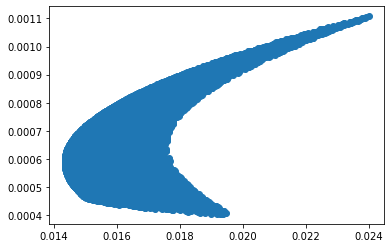

In [5]:
def get_random_weights():
    random = np.random.random(2)     
    return np.diff(np.concatenate(([0], sorted(random),[1])))

random_weights = [get_random_weights() for i in range(10000)]
means = [stocks.dot(weight).mean() for weight in random_weights]
stds = [stocks.dot(weight).std() for weight in random_weights]
plt.scatter(stds, means)

In [110]:
stocks.mean()

GE      0.000395
PFE     0.000511
SBUX    0.001113
dtype: float64

<AxesSubplot:xlabel='Date'>

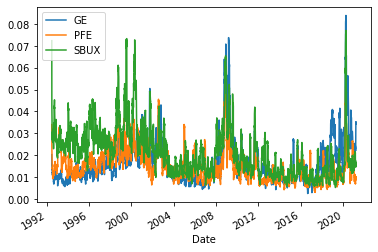

In [10]:
stocks.rolling("30d").std().plot()

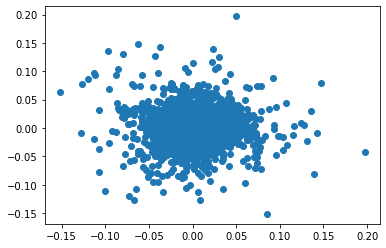

In [14]:
plt.scatter(stocks["GE"].shift(1).dropna(), stocks["GE"].iloc[1:])

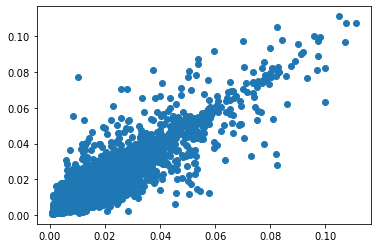

In [21]:
plt.scatter(stocks["GE"].rolling("7d").std().shift(1).dropna(), stocks["GE"].rolling("7d").std().dropna().iloc[1:])